In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv(r'C:\Users\Srivalli\OneDrive\Desktop\sem 5\ml\lab3 eval\heart_v2.csv')

In [6]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [7]:
x=df.drop('heart disease',axis=1)
y=df['heart disease']

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
class_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [10]:
class_rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
class_rf.oob_score_

0.656084656084656

In [12]:
class_rf.score(xtest,ytest)

0.654320987654321

# grid

In [13]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [17]:
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]

}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [21]:
grid_search.fit(xtrain,ytrain)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
grid_search.best_score_

np.float64(0.6985815602836879)

In [22]:
s=grid_search.best_estimator_
s

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

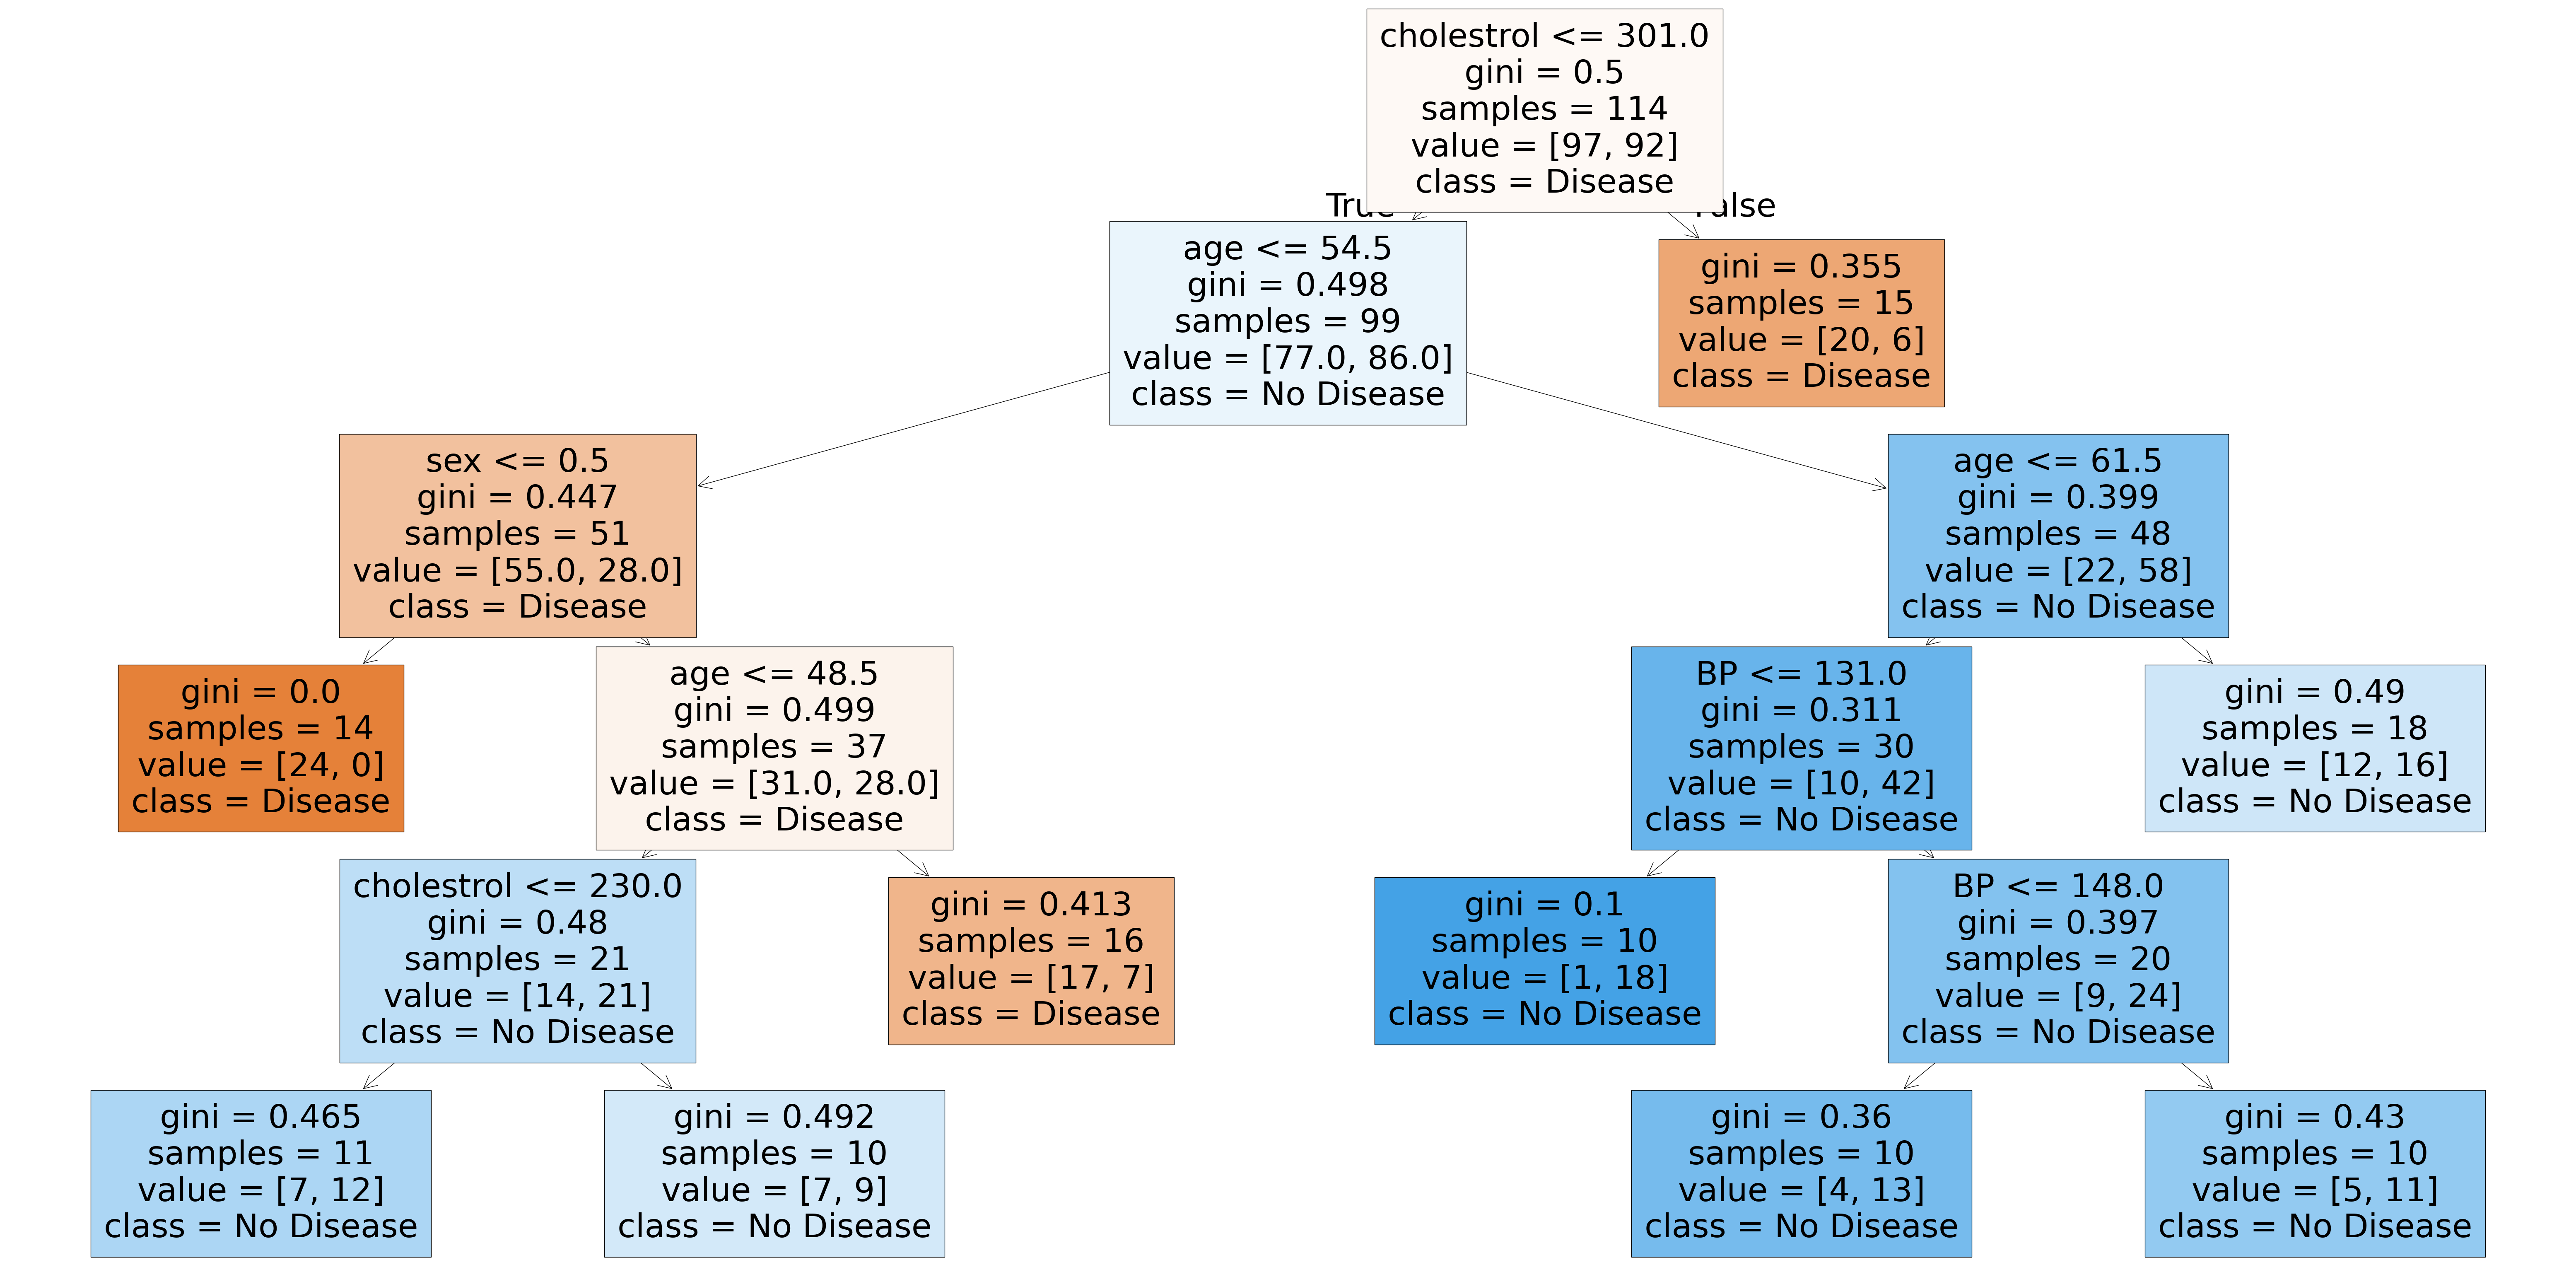

In [29]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(s.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

In [30]:
s.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])